In [33]:
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

454


0.8923829999999999

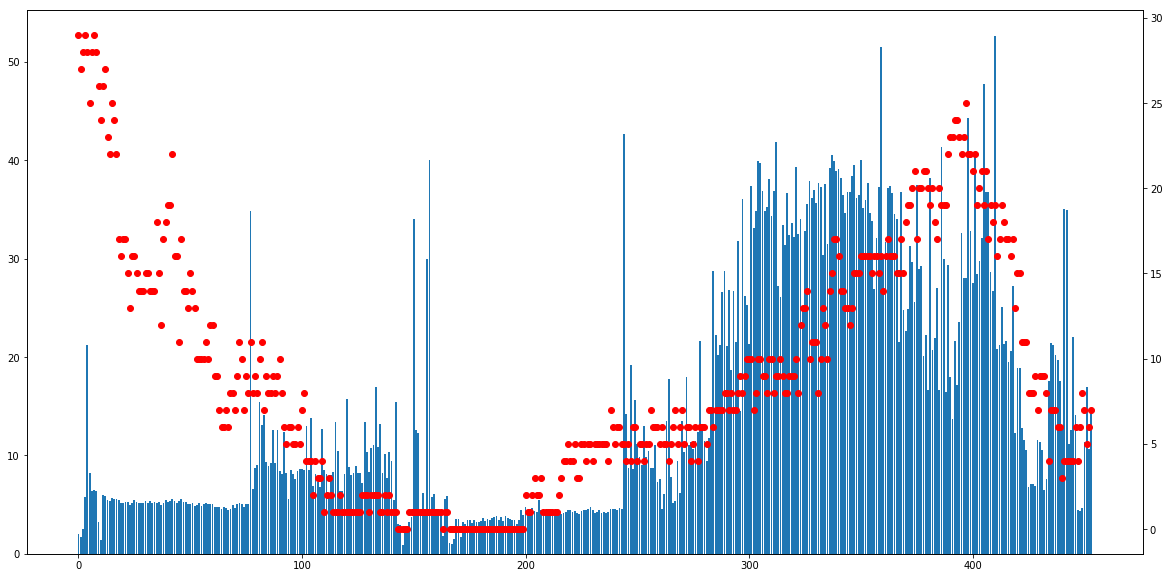

In [40]:
def read_prediction_log(folder, suffix):
    file_path = "./prediction/{}/prediction_{}.log".format(folder, suffix)
    containers = OrderedDict()
    pose_container = None
    trajectory_container = None
    perception_container = None
    response_time = None
    with open(file_path) as log_file:
        lines = log_file.readlines()
        pose_container = np.array([float(line.strip().split()[-2]) for line in lines if "PoseContainer" in line])
        trajectory_container = np.array([float(line.strip().split()[-2]) for line in lines if "TrajectoryContainer" in line])
        perception_container = np.array([float(line.strip().split()[-2]) for line in lines if "PerceptionContainer" in line])
        assert len(pose_container) == len(trajectory_container) == len(perception_container)
        response_time = pose_container + trajectory_container + perception_container
        containers["ObstaclesCount"] = np.array([float(line.strip().split()[-1]) for line in lines if "Prediction obstacles" in line])
        print(len(containers["ObstaclesCount"]))
    containers["PoseContainer"] = pose_container
    containers["TrajectoryContainer"] = trajectory_container
    containers["PerceptionContainer"] = perception_container
    containers["ResponseTime"] = response_time
    return containers

def plot_prediction_log(stats, name):
    figure, axes = plt.subplots(figsize=(20,10))
    axes.bar(range(len(stats["ResponseTime"])), stats["ResponseTime"])
    axes.set_title(name)
    axes2 = axes.twinx()
    axes2.plot(range(len(stats["ResponseTime"])), stats["ObstaclesCount"], "o", color="red")
    plt.savefig("prediction_log.svg")

def plot_prediction_logs(statss, names):
    figure, axes = plt.subplots(figsize=(20,10))
    p = []
    #p.append(axes.plot(range(len(statss[0]["ResponseTime"])), statss[0]["ResponseTime"]))
    #p.append(axes.plot(range(len(statss[1]["ResponseTime"])), statss[1]["ResponseTime"]))
    p.append(axes.plot(range(len(statss[2]["ResponseTime"])), statss[2]["ResponseTime"]))
    p.append(axes.plot(range(len(statss[3]["ResponseTime"])), statss[3]["ResponseTime"]))
    #axes.set_title(name)
    #axes.legend(p, names)
    plt.show()

#stats_cla_6 = read_prediction_log("classic_6", "cla_6")
#plot_prediction_log(stats_cla_6, "Classic 6")

#stats_cla_12 = read_prediction_log("classic_12", "cla_12")
#plot_prediction_log(stats_cla_12, "Classic 12")
#stats_cho_12 = read_prediction_log("choreography_12", "cho_12")
stats_cho_6 = read_prediction_log("choreography_6", "cho_6_old")
plot_prediction_log(stats_cho_6, "")
#plot_prediction_logs([stats_cla_6, stats_cla_12, stats_cho_6, stats_cho_12], ["cla 6", "cla 12", "cho 6", "cho 12"])

np.max(stats_cho_6["ResponseTime"])
np.min(stats_cho_6["ResponseTime"])

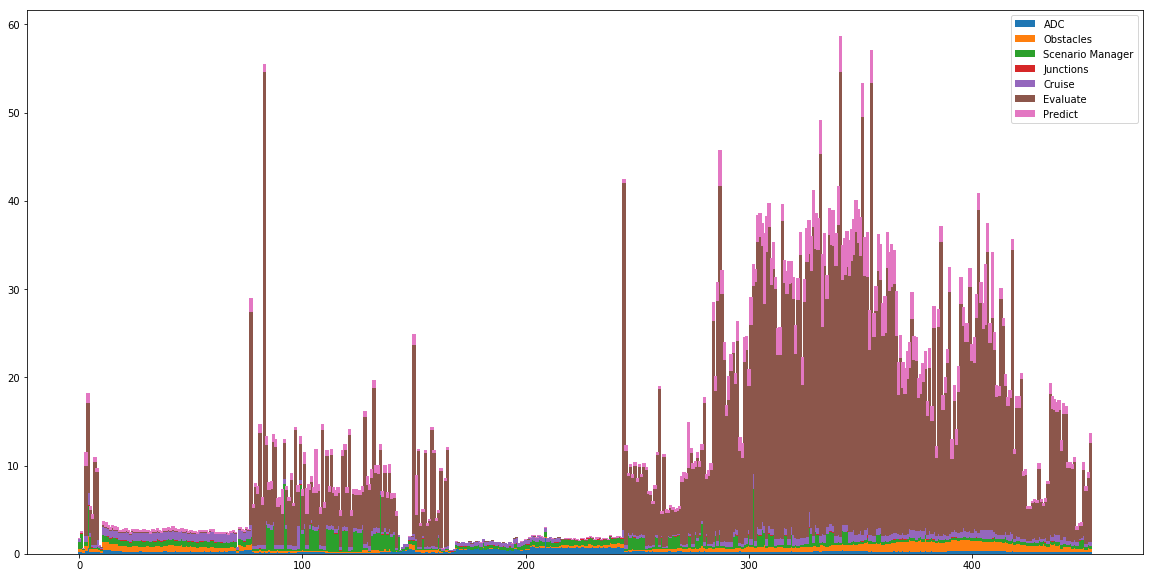

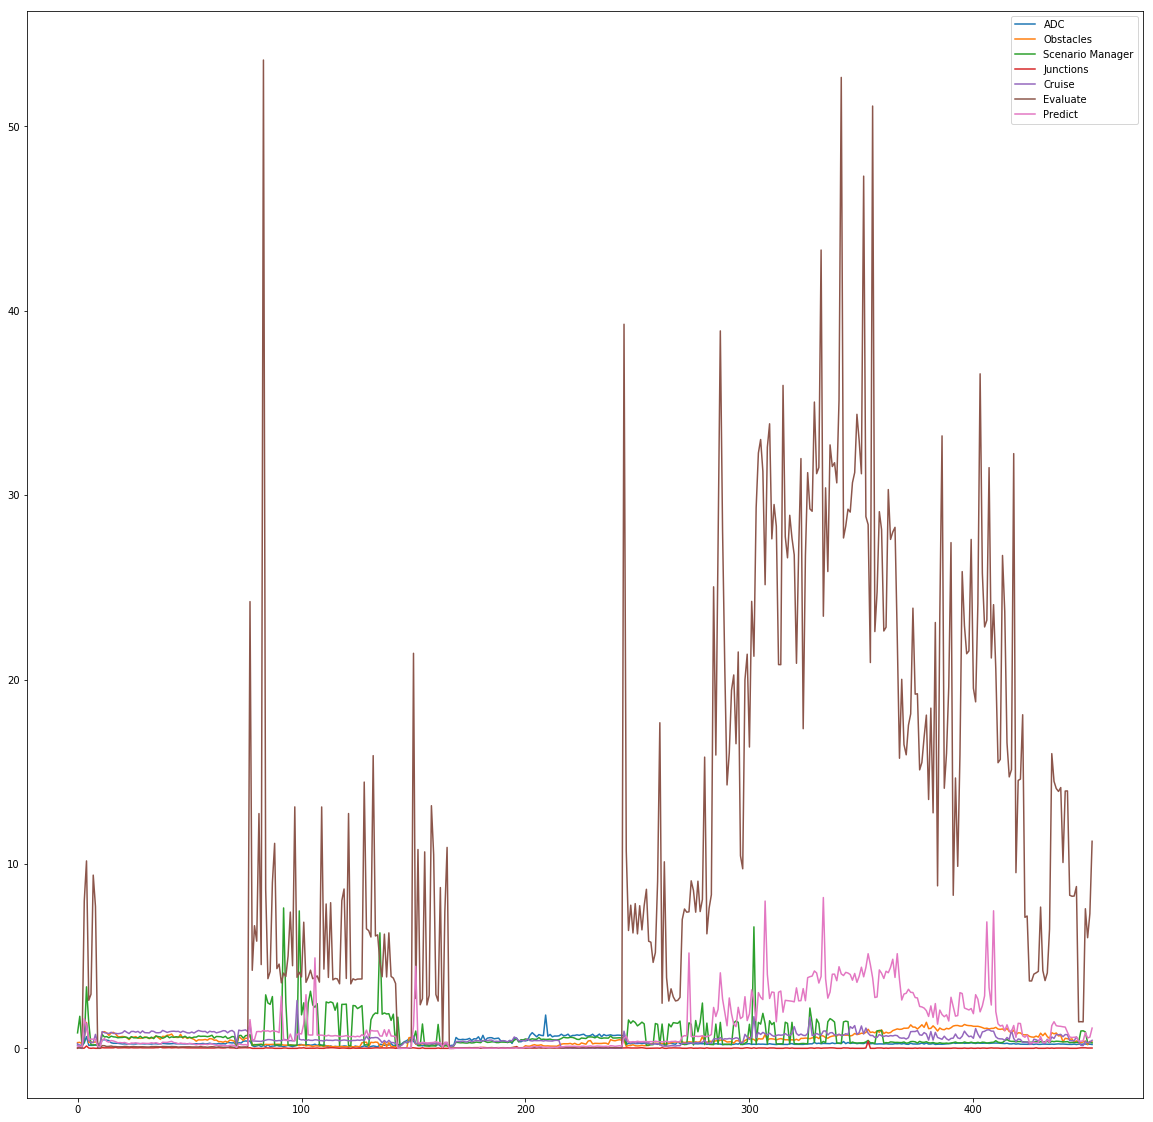

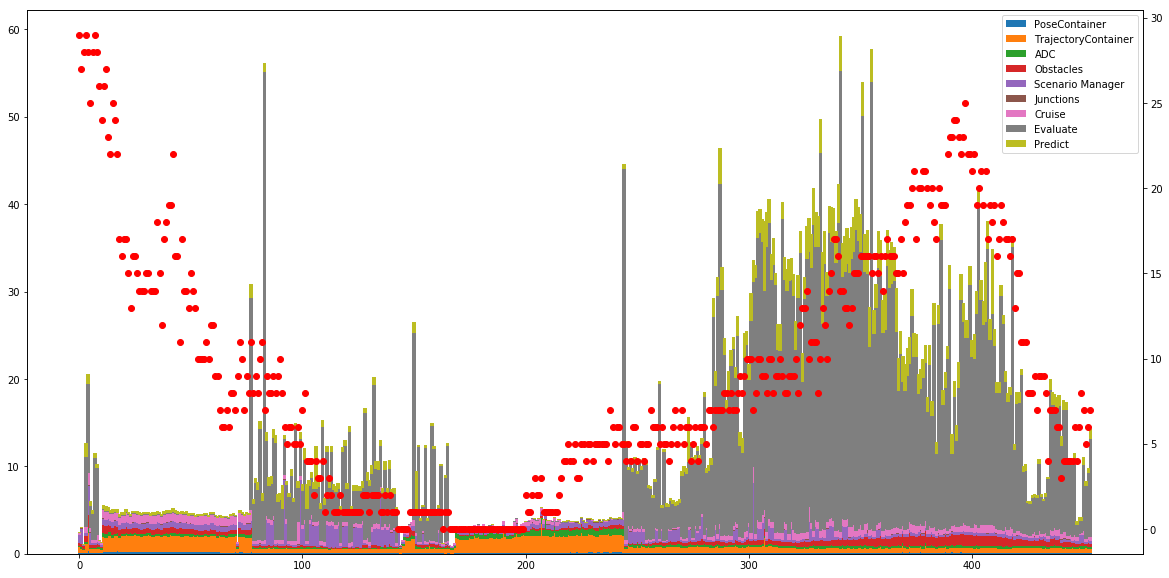

In [38]:
def read_prediction_process_log():
    file_path = "./prediction/choreography_6/prediction_process_cho_6.log"
    processes_times = OrderedDict()
    with open(file_path) as log_file:
        lines = log_file.readlines()
        processes_times["ADC"] = np.array([float(line.strip().split()[-2]) for line in lines if "ADC:" in line])
        processes_times["Obstacles"] = np.array([float(line.strip().split()[-2]) for line in lines if "obstacles" in line])
        processes_times["Scenario Manager"] = np.array([float(line.strip().split()[-2]) for line in lines if "scenario_manager" in line])
        processes_times["Junctions"] = np.array([float(line.strip().split()[-2]) for line in lines if "junction" in line])
        processes_times["Cruise"] = np.array([float(line.strip().split()[-2]) for line in lines if "cruise" in line])
        processes_times["Evaluate"] = np.array([float(line.strip().split()[-2]) for line in lines if "evaluate" in line])
        processes_times["Predict"] = np.array([float(line.strip().split()[-2]) for line in lines if "predict" in line])
    maxx = 0
    for key in processes_times.keys():
        if maxx == 0:
            maxx = len(processes_times[key])
        else:
            assert len(processes_times[key]) == maxx, key
    return processes_times

def plot_prediction_process_log(processes_times):
    figure, axes1 = plt.subplots(figsize=(20,10))
    legend_names = []
    legend_bars = []
    bottom = np.zeros(processes_times["ADC"].shape[0])
    for key in processes_times.keys():
        legend_bars.append(axes1.bar(range(len(processes_times[key])), processes_times[key], width=1.5, bottom=bottom))
        legend_names.append(key)
        bottom += processes_times[key]
    axes1.legend(legend_bars, legend_names)
    _, axes2 = plt.subplots(figsize=(20,20))
    l = []
    p = []
    for key in processes_times.keys():
        p.append(axes2.plot(range(len(processes_times[key])), processes_times[key], label=key)[0])
        l.append(key)
    plt.legend(p, l)
    plt.savefig("prediction_process.svg")

def plot_prediction_combined(processes_times, stats_cho_6):
    figure, axes1 = plt.subplots(figsize=(20,10))
    legend_names = []
    legend_bars = []
    bottom = np.zeros(processes_times["ADC"].shape[0])
    legend_bars.append(axes1.bar(range(len(stats_cho_6["PoseContainer"])), stats_cho_6["PoseContainer"], width=1.5, bottom=bottom))
    legend_names.append("PoseContainer")
    bottom += stats_cho_6["PoseContainer"]
    legend_bars.append(axes1.bar(range(len(stats_cho_6["TrajectoryContainer"])), stats_cho_6["TrajectoryContainer"], width=1.5, bottom=bottom))
    legend_names.append("TrajectoryContainer")
    bottom += stats_cho_6["TrajectoryContainer"]
    for key in processes_times.keys():
        legend_bars.append(axes1.bar(range(len(processes_times[key])), processes_times[key], width=1.5, bottom=bottom))
        legend_names.append(key)
        bottom += processes_times[key]
    axes1.legend(legend_bars, legend_names)
    axes2 = axes1.twinx()
    axes2.plot(range(len(stats_cho_6["ResponseTime"])), stats_cho_6["ObstaclesCount"], "o", color="red")
    plt.savefig("prediction_combined.svg")
    
plot_prediction_process_log(read_prediction_process_log())
plot_prediction_combined(read_prediction_process_log(), stats_cho_6)